In [30]:
import random
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [46]:
pokoleniya=100
population_size=100
chromosome_bodyoncetoldme=52
selection_count=10
mutation_kek=0.5
steps=False

In [32]:
def parse_tsp_file(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'(\d+) (\d+\.\d+) (\d+\.\d+)', line)
            if m:
                temp=m.groups()[1:]
                result.append((float(temp[0]), float(temp[1])))
    return result

# parse_tsp_file("berlin52.tsp.txt")

In [33]:
def read_optimal(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'^\d+$', line.rstrip())
            if m:
                result.append(int(m.group()))

    return result

# read_optimal("berlin52.opt.tour.txt")

In [34]:
data=parse_tsp_file("berlin52.tsp.txt")
optimal=read_optimal("berlin52.opt.tour.txt")

In [35]:
def prisposobl(chromosome):
    result=0
    for i in range(0, len(chromosome)):
        a=data[chromosome[i]-1]
        if(i<len(data)-1):
            b=data[chromosome[i+1]-1]
        elif(i==len(data)-1): 
            b=data[chromosome[0]-1]
        result+=math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    return result

prisposobl(optimal)

7544.365901904087

In [36]:
def generate_population(population):
    result=[]
    for i in range(population):
        temp=optimal[1:len(optimal)-1]
        random.shuffle(temp)
        temp.insert(0, optimal[0])
        temp.append(optimal[len(optimal)-1])
        result.append(temp)
    return result

generate_population(5)

[[1,
  19,
  17,
  40,
  15,
  44,
  37,
  24,
  30,
  7,
  16,
  38,
  20,
  47,
  12,
  8,
  26,
  32,
  35,
  28,
  43,
  21,
  27,
  52,
  9,
  13,
  29,
  45,
  14,
  4,
  33,
  36,
  48,
  5,
  31,
  23,
  10,
  3,
  25,
  46,
  18,
  41,
  39,
  6,
  11,
  42,
  49,
  34,
  2,
  51,
  50,
  22],
 [1,
  27,
  20,
  36,
  2,
  16,
  43,
  29,
  15,
  42,
  49,
  40,
  38,
  32,
  19,
  31,
  41,
  47,
  28,
  18,
  52,
  25,
  39,
  51,
  48,
  3,
  33,
  4,
  34,
  50,
  37,
  11,
  21,
  10,
  7,
  9,
  23,
  5,
  14,
  24,
  44,
  46,
  6,
  13,
  12,
  35,
  8,
  17,
  45,
  30,
  26,
  22],
 [1,
  14,
  43,
  31,
  28,
  23,
  26,
  7,
  27,
  6,
  33,
  32,
  46,
  42,
  18,
  12,
  25,
  10,
  52,
  39,
  38,
  47,
  36,
  49,
  20,
  13,
  11,
  3,
  34,
  5,
  15,
  8,
  35,
  24,
  37,
  50,
  9,
  16,
  40,
  21,
  41,
  48,
  4,
  45,
  44,
  29,
  30,
  19,
  17,
  51,
  2,
  22],
 [1,
  39,
  43,
  20,
  18,
  14,
  9,
  12,
  48,
  8,
  30,
  47,
  13,
  41,
  15,
 

In [37]:
def print_population(data):
    df=pd.DataFrame(data)
    print(df)

def population_best_result(data):
    result=999999
    best_shrek=[]
    for i in data:
        shrek=prisposobl(i)
        if(shrek<result): 
            result=shrek
            best_shrek=i
    return (result, best_shrek)

def population_max_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i), i))
    max_shrek=sorted(penis, key=itemgetter(0), reverse=True)[0]

    return (max_shrek)

def population_average_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i)))
    result=np.mean(penis)

    return result

# sex=generate_population(5)
# print(population_best_result(sex))
# print(population_max_result(sex))
# print(population_average_result(sex))

In [38]:

def roulette_selection(data, sel_count):
    pool=[]
    sectors=[]
    wheel=[]
    f_sum=0

    for chromosome in data:
        f=1/(1+prisposobl(chromosome))
        f_sum+=f
    for chromosome in data:
        f=1/(1+prisposobl(chromosome))
        v=f/f_sum*100
        sectors.append((v, chromosome))
    # sectors=sorted(sectors, key=itemgetter(0))
    point=0
    for i in range(0,len(sectors)-1):
        wheel.append((sectors[i][1], (point, point+sectors[i][0])))
        point+=sectors[i][0]
        if(i==len(sectors)-2): 
            wheel.append((sectors[i][1], (point, 100)))
    # print(wheel)
    for i in range(sel_count):
        choice=random.randint(0,100)
        for j in wheel:
            # if((choice>=j[1][0]) and (choice<=j[1][1]) and (j[0] not in pool)): 
            if((choice>=j[1][0]) and (choice<=j[1][1])): 
                pool.append(j[0])
                break
    
    return pool

roulette_selection(generate_population(10), 5)

[[1,
  39,
  4,
  13,
  36,
  34,
  51,
  11,
  26,
  38,
  19,
  44,
  23,
  14,
  3,
  50,
  6,
  45,
  37,
  43,
  33,
  46,
  25,
  35,
  15,
  29,
  9,
  7,
  42,
  20,
  27,
  40,
  24,
  47,
  52,
  10,
  16,
  2,
  5,
  21,
  41,
  18,
  28,
  31,
  17,
  32,
  30,
  12,
  49,
  8,
  48,
  22],
 [1,
  36,
  39,
  17,
  47,
  28,
  14,
  29,
  16,
  46,
  11,
  21,
  34,
  41,
  7,
  12,
  50,
  51,
  24,
  13,
  40,
  25,
  30,
  15,
  2,
  5,
  37,
  10,
  8,
  45,
  44,
  6,
  3,
  20,
  49,
  31,
  52,
  18,
  48,
  9,
  42,
  19,
  38,
  35,
  43,
  4,
  26,
  23,
  27,
  32,
  33,
  22],
 [1,
  8,
  42,
  51,
  49,
  20,
  13,
  23,
  32,
  39,
  38,
  12,
  2,
  31,
  48,
  46,
  26,
  3,
  30,
  29,
  35,
  45,
  43,
  9,
  33,
  44,
  11,
  27,
  6,
  21,
  10,
  24,
  40,
  47,
  37,
  14,
  4,
  17,
  36,
  41,
  52,
  25,
  50,
  19,
  18,
  16,
  7,
  5,
  28,
  34,
  15,
  22],
 [1,
  36,
  39,
  17,
  47,
  28,
  14,
  29,
  16,
  46,
  11,
  21,
  34,
  41,
  7,


In [39]:
def simple_selection(data, sel_count):
    pool=[]
    adaptation=[]
    for chromosome in data:
        adaptation.append((prisposobl(chromosome), chromosome))
    adaptation=sorted(adaptation, key=itemgetter(0))
    for i in range(0, sel_count):
        pool.append(adaptation[i][1])

    return pool

simple_selection(generate_population(10), 5)

[[1,
  52,
  38,
  5,
  35,
  33,
  49,
  12,
  18,
  40,
  16,
  44,
  9,
  26,
  24,
  7,
  31,
  23,
  2,
  39,
  50,
  30,
  15,
  34,
  37,
  28,
  46,
  14,
  13,
  4,
  32,
  42,
  11,
  25,
  36,
  48,
  21,
  27,
  43,
  10,
  41,
  8,
  51,
  29,
  20,
  6,
  45,
  3,
  47,
  17,
  19,
  22],
 [1,
  5,
  9,
  20,
  37,
  8,
  13,
  28,
  14,
  47,
  4,
  35,
  15,
  39,
  32,
  24,
  40,
  23,
  44,
  42,
  16,
  21,
  27,
  26,
  38,
  30,
  36,
  29,
  31,
  2,
  18,
  43,
  33,
  51,
  45,
  46,
  34,
  52,
  48,
  3,
  10,
  7,
  6,
  19,
  12,
  50,
  49,
  41,
  25,
  17,
  11,
  22],
 [1,
  17,
  7,
  39,
  26,
  19,
  27,
  25,
  43,
  37,
  35,
  46,
  40,
  12,
  9,
  30,
  5,
  23,
  14,
  13,
  10,
  41,
  52,
  3,
  32,
  42,
  2,
  24,
  33,
  31,
  36,
  11,
  29,
  4,
  16,
  20,
  21,
  34,
  51,
  47,
  50,
  44,
  8,
  38,
  6,
  45,
  15,
  48,
  49,
  18,
  28,
  22],
 [1,
  24,
  27,
  28,
  38,
  50,
  15,
  33,
  14,
  8,
  16,
  47,
  34,
  17,
  43,


In [40]:
def permutation_crossover(parent1, parent2, chromo_length):
    chromo_length-=2
    par1_start=parent1[0]
    par2_start=parent2[0]
    par1_end=parent1[len(parent1)-1]
    par2_end=parent2[len(parent1)-1]
    parent1=parent1[1:len(parent1)-1]
    parent2=parent2[1:len(parent2)-1]

    pos1=random.randint(1, chromo_length//2-1)
    pos2=random.randint(pos1+1, chromo_length-1)
    middle=parent1[pos1:pos2+1]
    shrek=[]
    for i in parent2:
        if not (i in middle): shrek.append(i)
    child1=[]
    for i in range(0, chromo_length-1):
        if(i<pos1): child1.append(shrek.pop(0))
        elif(i==pos1): child1+=middle
        elif(i==pos2): child1.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)>0): child1.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)==0): child1.append(parent2[i])
    
    middle=parent2[pos1:pos2+1]
    shrek=[]
    for i in parent1:
        if not (i in middle): shrek.append(i)
    child2=[]
    for i in range(0, chromo_length-1):
        if(i<pos1): child2.append(shrek.pop(0))
        elif(i==pos1): child2+=middle
        elif(i==pos2): child2.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)>0): child2.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)==0): child2.append(parent1[i])

    child1.insert(0, par1_start)
    child1.append(par1_end)
    child2.insert(0, par2_start)
    child2.append(par2_end)
    return child1, child2

permutation_crossover([1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], 8)

([1, 7, 3, 4, 6, 5, 2, 8], [8, 2, 6, 5, 3, 4, 7, 1])

In [41]:
def two_point_crossover(parent1, parent2, chromo_length):
    chromo_length-=2
    par1_start=parent1[0]
    par2_start=parent2[0]
    par1_end=parent1[len(parent1)-1]
    par2_end=parent2[len(parent1)-1]
    parent1=parent1[1:len(parent1)-1]
    parent2=parent2[1:len(parent2)-1]

    pos1=random.randint(1, chromo_length//2-1)
    pos2=random.randint(pos1+1, chromo_length-1)

    child1=parent1[0:pos1]+parent2[pos1-1:pos2]+parent1[pos2+1:chromo_length]
    child2=parent2[0:pos1]+parent1[pos1-1:pos2]+parent2[pos2+1:chromo_length]

    child1.insert(0, par1_start)
    child1.append(par1_end)
    child2.insert(0, par2_start)
    child2.append(par2_end)
    return child1, child2

two_point_crossover([1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], 8)

([1, 2, 3, 6, 5, 6, 7, 8], [8, 7, 6, 3, 4, 3, 2, 1])

In [42]:
def mutation(chromosome, chrom_length):
    result=chromosome
    choice=random.random()
    
    if(choice-mutation_kek<=0):
        pos1=random.randint(2, chrom_length//2-1)
        pos2=random.randint(pos1+1, chrom_length-2)
        shrek=result[pos1:pos2+1]
        random.shuffle(shrek)
        result[pos1:pos2+1]=shrek

    return result

mutation([1,2,3,4,5,6,7,8], 8)

[1, 2, 3, 4, 5, 6, 7, 8]

In [51]:
average_results=[]
max_results=[]
min_results=[]
best=[]

if(steps):
    current_population=generate_population(population_size)
    print("первая популяция создана:")
    print_population(current_population)
    print("Лучшее значение приспособленности:")
    print(population_best_result(current_population))
    current_population=roulette_selection(current_population, selection_count)
    print_population(current_population)
    print(population_best_result(current_population))
    
else:
    current_population=generate_population(population_size)
    print("первая популяция создана:")
    print_population(current_population)
    print("Лучшее значение приспособленности:")
    print(population_best_result(current_population))

    for pok in range(pokoleniya):
        print(f"Поколение {pok+1}")
        current_population=simple_selection(current_population, selection_count)
        print("селекция произведена")
        print("результат селекции:")
        print_population(current_population)
        print("Лучшее значение приспособленности после селекции:")
        print(population_best_result(current_population))
        
        for i in range((population_size-selection_count)//2):
            parent1=random.randint(0, selection_count-1)
            parent2=random.randint(0, selection_count-1)
            while(parent2==parent1): parent2=random.randint(0, selection_count-1)
            children=permutation_crossover(current_population[parent1], current_population[parent2], chromosome_bodyoncetoldme)
            current_population.append(children[0])
            current_population.append(children[1])
        if(len(current_population)<population_size): 
            current_population.append(generate_population(1)[0])
        print("скрещивание произведено")
        print("результат скрещивания:")
        print_population(current_population)
        print("Лучшее значение приспособленности после скрещивания:")
        print(population_best_result(current_population))

        temp=current_population
        for i_chel in range(0, len(current_population)-1):
            temp[i_chel]=mutation(current_population[i_chel], chromosome_bodyoncetoldme)
        current_population=temp
        print("мутация произведена")
        print("результат мутации:")
        print_population(current_population)
        print("Лучшее значение приспособленности после мутации:")
        sas1=population_best_result(current_population)
        print(sas1)
        min_results.append(sas1[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=sas1[1]

        print(f"Конец {pok+1} поколения")

первая популяция создана:
    0   1   2   3   4   5   6   7   8   9   ...  42  43  44  45  46  47  48  \
0    1  52  30  10  19  12  16  21  46  39  ...  31  41  28  14  50  38   2   
1    1  45   7  48  25  13  30  39  20  42  ...  29  51  24  49  17  47  12   
2    1  49  41  11  50  51  23  13  38  39  ...  19  48  33   8  10  44  21   
3    1   7  15  50  19  32  21  17  47  31  ...  36  46  10  45  12  26   4   
4    1  31  32   9  42   7  46  37  24  27  ...  25  33  23  48  45  44  14   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
95   1   2  38  42  21  30  37  23  11  27  ...  17  25  10  16   4   7  48   
96   1  12  17  39  19  21  49   9  26   6  ...  36  24  43  25  20  41  11   
97   1  48  15   4  38  33  32  16  47  42  ...  21  18  30  44  31  17  39   
98   1  38  26  23   7  24  27  10  21  30  ...  12   3  33  47  41  11  51   
99   1   3  25   7  39  15  24  12   5  21  ...  23  49  31   8  35  45  52   

    49  50  51  
0   37  

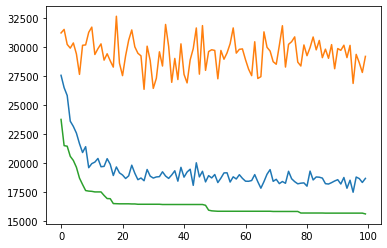

In [49]:
def draw_progress(average_results, max_results, min_results, pok_count):
    x=range(pok_count)
    y1=average_results
    y2=max_results
    y3=min_results
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x,y3)
    plt.show()

draw_progress(average_results, max_results, min_results, pokoleniya)

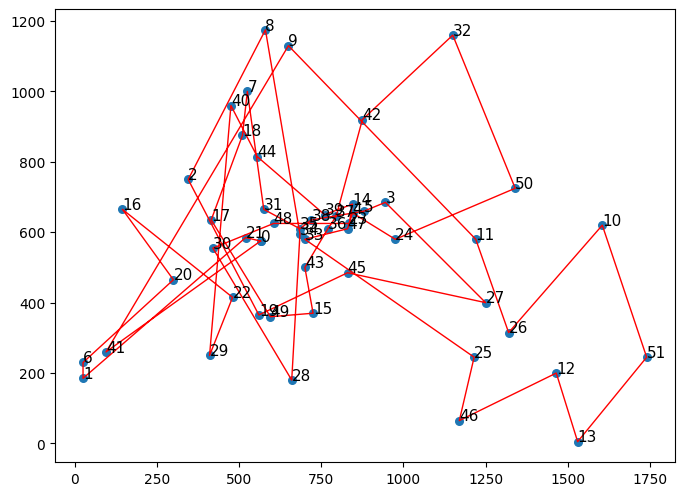

In [56]:
def draw_best_graph(best_shromo):
    plt.figure(figsize=(8, 6), dpi=100)
    x = [data[i-1][0] for i in best_shromo]
    x.append(x[0])
    y = [data[i-1][1] for i in best_shromo]
    y.append(y[0])
    plt.plot(x, y, linewidth=1, color='r')
    plt.scatter(x, y, s=30)
    for i in best_shromo:
        plt.annotate(i-1, data[i-1], size=11)
    plt.show()
draw_best_graph(best)